In [1]:
# function to convert 'True' and 'False' string values from config file to boolean
def str_to_bool(s):
    if s == 'True':
         return True
    elif s == 'False':
         return False
    else:
         print("Incorrect boolean value")

In [2]:
def ConfigSectionMap(section):
    #print(section)
    dict1 = {}
    options = config.options(section)
    #print(options)
    for option in options:
        try:
            dict1[option] = config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1

import configparser
config = configparser.ConfigParser()
config.read('CNNConfig.INI')
print(config.sections())
try:
    count1_1 = int(ConfigSectionMap("Layer1")['count1'])
    activation1_1 = ConfigSectionMap("Layer1")['activation1']
    filter1_1 = int(ConfigSectionMap("Layer1")['filter1'])
    count1_2 = int(ConfigSectionMap("Layer1")['count2'])
    activation1_2 = ConfigSectionMap("Layer2")['activation2']
    filter1_2 = int(ConfigSectionMap("Layer1")['filter2'])
    max_pool_size1 = int(ConfigSectionMap("Layer1")['max_pool_size'])
    dropout1 = float(ConfigSectionMap("Layer1")['dropout'])
    print("Layer 1 parameters :")
    print("Count 1 :", count1_1)
    print("Activation 1 :", activation1_1)
    print("Filter 1 :", filter1_1)
    print("Count 2 :", count1_2)
    print("Activation 2 :", activation1_2)
    print("Filter 2 :", filter1_2)
    print("Max Pool Size :", max_pool_size1)
    print("Dropout :", dropout1)
    print()
    
    count2_1 = int(ConfigSectionMap("Layer2")['count1'])
    activation2_1 = ConfigSectionMap("Layer2")['activation1']
    filter2_1 = int(ConfigSectionMap("Layer2")['filter1'])
    count2_2 = int(ConfigSectionMap("Layer2")['count2'])
    activation2_2 = ConfigSectionMap("Layer2")['activation2']
    filter2_2 = int(ConfigSectionMap("Layer2")['filter2'])
    max_pool_size2 = int(ConfigSectionMap("Layer2")['max_pool_size'])
    dropout2 = float(ConfigSectionMap("Layer2")['dropout'])
    print("Layer 2 parameters :")
    print("Count 1 :" ,count2_1)
    print("Activation 1 :" ,activation2_1)
    print("Filter 1 :" ,filter2_1)
    print("Count 2 :", count2_2)
    print("Activation 2 :" ,activation2_2)
    print("Filter 2 :" ,filter2_2)
    print("Max Pool Size :", max_pool_size2)
    print("Dropout :" ,dropout2)
    print()
    
    count3_1 = int(ConfigSectionMap("Layer3")['count1'])
    activation3_1 = ConfigSectionMap("Layer3")['activation1']
    dropout3 = float(ConfigSectionMap("Layer3")['dropout'])
    activation3_2 = ConfigSectionMap("Layer3")['activation2']
    print("Layer 3 parameters :")
    print("Count 1 :" ,count3_1)
    print("Activation 1 :", activation3_1)
    print("Dropout :" ,dropout3)
    print("Activation 2 :", activation3_2)
    print()
    
    epochs = int(ConfigSectionMap("Others")['epoch'])
    data_aug = str_to_bool(ConfigSectionMap("Others")['data_augmentation'])
    learning_rate = float(ConfigSectionMap("Others")['learning_rate'])
    decay = float(ConfigSectionMap("Others")['decay'])
    #optimizers = ConfigSectionMap("Compile")['optimizer']
    loss = ConfigSectionMap("Compile")['loss']
    metrics = ConfigSectionMap("Compile")['metrics']
    batch_size = int(ConfigSectionMap("Others")['batch_size'])
    workers = int(ConfigSectionMap("Others")['workers'])
    num_classes = int(ConfigSectionMap("Others")['num_classes'])
    print("Other parameters :")
    #print(ConfigSectionMap("Others"))
    #print("optimizer :" ,optimizers)
    print("loss :", loss)
    print("metrics :", metrics)
    print("batch_size :", batch_size)
    print("epochs :" ,epochs)
    print("data_aug :", data_aug)
    print("learning_rate :" ,learning_rate)
    print("decay :", decay)
    print("workers :",workers)
    print("num_classes :",num_classes)
    print()
    
    print("All parameters loaded from config file")
except:
    print("Incorrect parameters")

[u'Layer1', u'Layer2', u'Layer3', u'Compile', u'Others']
Layer 1 parameters :
('Count 1 :', 32)
('Activation 1 :', u'relu')
('Filter 1 :', 3)
('Count 2 :', 32)
('Activation 2 :', u'relu')
('Filter 2 :', 3)
('Max Pool Size :', 2)
('Dropout :', 0.25)
()
Layer 2 parameters :
('Count 1 :', 64)
('Activation 1 :', u'relu')
('Filter 1 :', 3)
('Count 2 :', 64)
('Activation 2 :', u'relu')
('Filter 2 :', 3)
('Max Pool Size :', 2)
('Dropout :', 0.25)
()
Layer 3 parameters :
('Count 1 :', 512)
('Activation 1 :', u'relu')
('Dropout :', 0.5)
('Activation 2 :', u'softmax')
()
Other parameters :
('loss :', u'categorical_crossentropy')
('metrics :', u'accuracy')
('batch_size :', 500)
('epochs :', 3)
('data_aug :', True)
('learning_rate :', 0.0001)
('decay :', 1e-06)
('workers :', 4)
('num_classes :', 255)
()
All parameters loaded from config file


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: You passed a bytestring as `filenames`. This will not work on Python 3. Use `cp.read_file()` or switch to using Unicode strings across the board.


In [3]:
from __future__ import print_function
import pandas as pd
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import csv
import os

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# The data, shuffled and split between train and test sets:

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
print("Training data length :", len(train_data))
print("Test data length :",len(test_data))
print("Data shape : ",train_data.shape)
print("Max value of single cell :",train_data[0].max())
print("No of labels :",train_labels.max() + 1)

# Convert class vectors to binary class matrices.
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

#print("Sample data :",train_data[0])

Training data length : 50000
Test data length : 10000
Data shape :  (50000, 32, 32, 3)
Max value of single cell : 255
No of labels : 10


In [5]:
model = Sequential()
model.add(Conv2D(count1_1, (filter1_1, filter1_1), padding='same',
                 input_shape=train_data.shape[1:]))
model.add(Activation(activation1_1))
model.add(Conv2D(count1_2, (filter1_2, filter1_2)))
model.add(Activation(activation1_2))
model.add(MaxPooling2D(pool_size=(max_pool_size1, max_pool_size1)))
model.add(Dropout(dropout1))

model.add(Conv2D(count2_1, (filter2_1, filter2_1), padding='same'))
model.add(Activation(activation2_1))
model.add(Conv2D(count2_2, (filter2_2, filter2_2)))
model.add(Activation(activation2_2))
model.add(MaxPooling2D(pool_size=(max_pool_size2, max_pool_size2)))
model.add(Dropout(dropout2))

model.add(Flatten())
model.add(Dense(count3_1))
model.add(Activation(activation3_1))
model.add(Dropout(dropout3))
model.add(Dense(train_data[0].max()))
model.add(Activation(activation3_2))

# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=learning_rate, decay=decay)

# Let's train the model using RMSprop
model.compile(loss=loss,
              optimizer=opt,
              metrics=[metrics])

In [6]:

#reshape 32x32x3 tensor to 3072x1,convert to data type float32 and normalizing values between 0 and 1
#train_data = train_data.reshape(50000, 3072)
#test_data = test_data.reshape(10000, 3072)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
#print("Data reshaped :",train_data.shape)
train_data/=255
test_data/=255
print("Data normalized between range",train_data.min(),"and",train_data.max())
#print("Sample data :",train_data[0])




if not data_aug:
    print('Not using data augmentation.')
    model.fit(train_data, train_labels,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_data, test_labels),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    datagen.fit(train_data)
    history = model.fit_generator(datagen.flow(train_data, train_labels,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(test_data, test_labels),
                        workers=0)



Data normalized between range 0.0 and 1.0
Using real-time data augmentation.
Epoch 1/3
100/100 [==============================] - 25s 255ms/step - loss: 3.2031 - acc: 0.1058 - val_loss: 2.3701 - val_acc: 0.1952
Epoch 2/3
100/100 [==============================] - 22s 218ms/step - loss: 2.2874 - acc: 0.1903 - val_loss: 2.0713 - val_acc: 0.3145
Epoch 3/3
100/100 [==============================] - 23s 230ms/step - loss: 2.0131 - acc: 0.2754 - val_loss: 1.7694 - val_acc: 0.3879


In [8]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: name 'save_dir' is not defined

In [11]:

# Score trained model.
scores = model.evaluate(test_data, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 149us/step
Test loss: 1.7694335372924805
Test accuracy: 0.3879


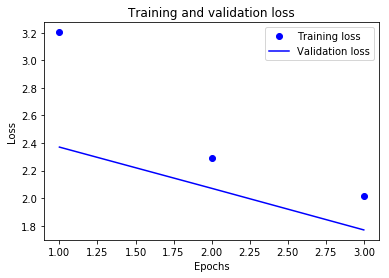

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

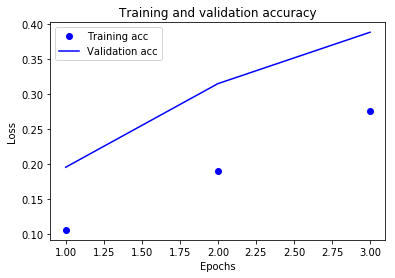

In [14]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()